In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
model = pd.read_csv('df.csv', index_col = 0)

<AxesSubplot:xlabel='Date'>

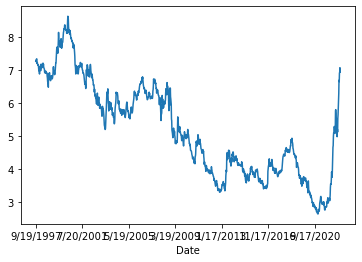

In [3]:
# 30Y PLOT: Pushed 1 week in advance
model['30Yr'].plot()

<AxesSubplot:>

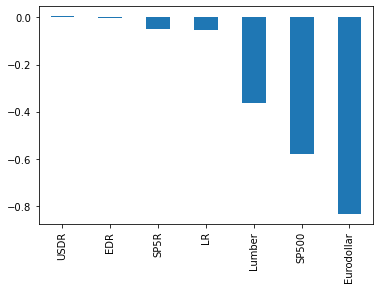

In [4]:
corr = model.corr()

# Top correlation
corr_reg = corr['30Yr'].sort_values(ascending = False)[2:].abs().sort_values(ascending = False)[:15].index
corr[corr.index.isin(corr_reg)]['30Yr'].sort_values(ascending = False).plot(kind = 'bar')

In [5]:
# Drop last row
model = model[:-1].dropna()

In [6]:
# TOTAL INPUTS:
print(len(model.columns)-1,'total inputs')
print(len(model),'total months')

8 total inputs
1310 total months


In [7]:
# PRE PROCESSING
X = model.drop(['30Yr'],axis = 1)
y = model['30Yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MSE: 0.3077911235205433
RMSE: 0.5547892604589091
RRMSE: 0.10774392951147617
MAE: 0.45431142177837985
RMAE: 0.08823043503736631
EV: 0.8524048197305703
R2: 0.8512117669374899


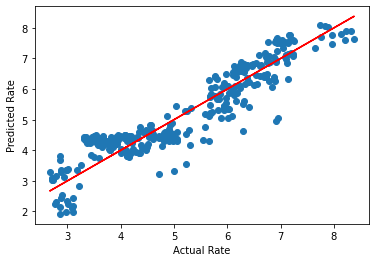

In [8]:
# REGRESSION MODELING #
# LINEAR REGRESSION MODEL LM1

lm = LinearRegression()
lm.fit(X_train,y_train)

# PREDICTIONS LM1
plm = lm.predict(X_test)
plt.scatter(y_test,plm)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

# EVALUATE THE MODEL LM1
print("MSE:",metrics.mean_squared_error (y_test,plm))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,plm)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,plm))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, plm))
print("RMAE:", metrics.mean_absolute_error (y_test, plm)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,plm))
print("R2:", metrics.r2_score(y_test,plm))

In [9]:
lm1coeff = pd.DataFrame(lm.coef_, X.columns,columns = ["Coeff"])

pd.set_option('display.max_rows', 8)
pd.options.display.float_format = '{:.5f}'.format
lm1coeff['Coeff'].astype(float)

Eurodollar   -0.91480
EDR          -0.05246
Lumber        0.31783
LR           -0.02576
SP500        -0.86616
SP5R          0.00221
USD           0.30760
USDR         -0.00705
Name: Coeff, dtype: float64

MSE: 0.05690274390243904
RMSE: 0.2385429602869031
RRMSE: 0.04632670047965817
MAE: 0.1458841463414634
RMAE: 0.028331714942093193
EV: 0.9725025526761043
R2: 0.9724928431177212


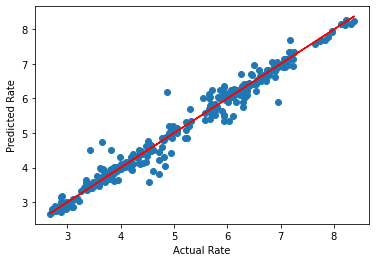

In [10]:
# DECISION TREE
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

p2 = dtree.predict(X_test)

# PREDICTIONS DECISION TREE
plt.scatter(y_test,p2)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

# EVALUATE THE MODEL DT1
print("MSE:",metrics.mean_squared_error (y_test,p2))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,p2)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,p2))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, p2))
print("RMAE:", metrics.mean_absolute_error (y_test, p2)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,p2))
print("R2:", metrics.r2_score(y_test,p2))

MSE: 0.031630495603658285
RMSE: 0.17784964324861122
RRMSE: 0.03453963656392519
MAE: 0.12367585365853481
RMAE: 0.024018710181654225
EV: 0.9847455820435982
R2: 0.9847096124867757


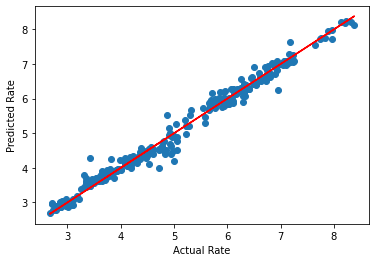

In [11]:
#RANDOM FOREST Regressor: RFR1
# RANDOM FOREST 1: RF1
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)

# PREDICTIONS RFR1
plt.scatter(y_test,p2)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

# EVALUATE THE MODEL RFR1
print("MSE:",metrics.mean_squared_error (y_test,p2))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,p2)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,p2))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, p2))
print("RMAE:", metrics.mean_absolute_error (y_test, p2)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,p2))
print("R2:", metrics.r2_score(y_test,p2))

In [12]:
new = pd.read_csv('new.csv', index_col = 0).drop(['30Yr'], axis = 1)
# Prediction
new = scaler.transform(new)

In [13]:
rf.predict(new)

array([6.78743, 6.09725])

In [14]:
# PREDICTION FOR WEEK OF 11/6-11/12
print('Upper Bound Prediction:',(rf.predict(new)+np.sqrt(metrics.mean_squared_error (y_test,p2)))[0])
print('Lower Bound Prediction:',(rf.predict(new)-np.sqrt(metrics.mean_squared_error (y_test,p2)))[0])

Upper Bound Prediction: 6.965279643248534
Lower Bound Prediction: 6.609580356751312


In [15]:
# PREDICTION FOR WEEK OF 11/13-11/19
print('Upper Bound Prediction:',(rf.predict(new)+np.sqrt(metrics.mean_squared_error (y_test,p2)))[1])
print('Lower Bound Prediction:',(rf.predict(new)-np.sqrt(metrics.mean_squared_error (y_test,p2)))[1])

Upper Bound Prediction: 6.275099643248639
Lower Bound Prediction: 5.919400356751417
